## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing the Data

In [2]:
app= pd.read_csv("application_data.csv")
prev_app= pd.read_csv("previous_application.csv")

## Checking the structure of data

In [3]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
app.shape

(307511, 122)

In [7]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
prev_app.shape

(1670214, 37)

In [9]:
app_null=(app.isnull().sum()/app.shape[0]*100).sort_values(ascending=False)

In [10]:
app_null[app_null>50]

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
FLOORSMIN_MEDI              67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_AVG               67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MODE            66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
LANDAREA_MEDI               59.376738
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
BASEMENTAREA_MODE           58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MEDI          55.179164
NONLIVINGAREA_AVG           55.179164
NONLIVINGARE

As the application_data has many columns which are >50% blank we will be ignoring them as they are irrelevant for ascertaining the credit worth of the applicants. Additionally the applicant are usually hesitant about disclosing the information about the building where they live so it cannot be imputed with reasonable accuracy.

Only relevant information that could be used from building/house of the applicant is the value of property by the address which is not given

65.9908100848425


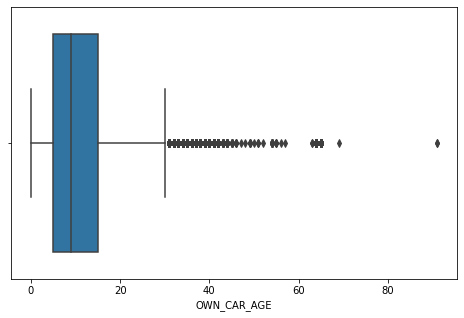

In [11]:
print(app.OWN_CAR_AGE.isnull().sum()/app.shape[0]*100)

plt.figure(figsize=[8,5])
sns.boxplot(app.OWN_CAR_AGE)
plt.show()

As per the data in column OWN_CAR_AGE which is 65% blank a reasonable imputation can be made that age of car owned by the applicants if 10 years i.e. the median value ignoring the outliers present.
Cars with life above 30 yrs are considered as outliers as those cars are usually kept for collection purposes (Vintage cars) rather than day to day use. Another reason of such long car life could be sentimental reasons. In any case these values are to be disregarded when drawing a conclusion about the population.

In [12]:
app[(app.OWN_CAR_AGE.isnull())&(app['FLAG_OWN_CAR']=='Y')]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
30897,135867,0,Cash loans,M,Y,N,1,495000.0,1006920.0,45630.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
181231,310040,0,Cash loans,F,Y,N,0,112500.0,301464.0,22068.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
217549,352070,0,Cash loans,M,Y,N,0,225000.0,900000.0,26446.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
229867,366246,0,Cash loans,F,Y,Y,1,225000.0,518562.0,25078.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
236868,374361,0,Cash loans,F,Y,Y,0,225000.0,233833.5,26577.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0


As the cases where this imputation could be done (Car owned but life of Car not mentioned) is neglible the imputation is not done at all

In [13]:
# dropping the columns with more than 50% empty values
app.dropna(thresh =len(app)*0.50, axis=1, inplace=True)

In [14]:
app.shape

(307511, 81)

After dropping columns with Null values more than 50% we have 81 columns remaining in application_data

In [15]:
# checking if any relevant column is still having significant blanks for imputation
app_null_2=(app.isnull().sum()/app.shape[0]*100).sort_values(ascending=False)

In [16]:
app_null_2[app_null_2>0]

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

## Imputation of Missing data

In [17]:
app['CODE_GENDER'].value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [18]:
# As majority of application from Females assumed than XNA is also Female applicatants 
app.loc[app['CODE_GENDER']=='XNA','CODE_GENDER']='F'
app['CODE_GENDER'].value_counts(normalize=True)

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64

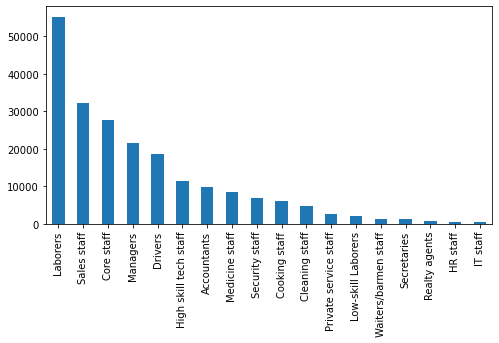

In [19]:
# Checking the most common occupation type to impute the missing value with
app.OCCUPATION_TYPE.value_counts().plot(kind= 'bar', figsize = (8,4))
plt.show()

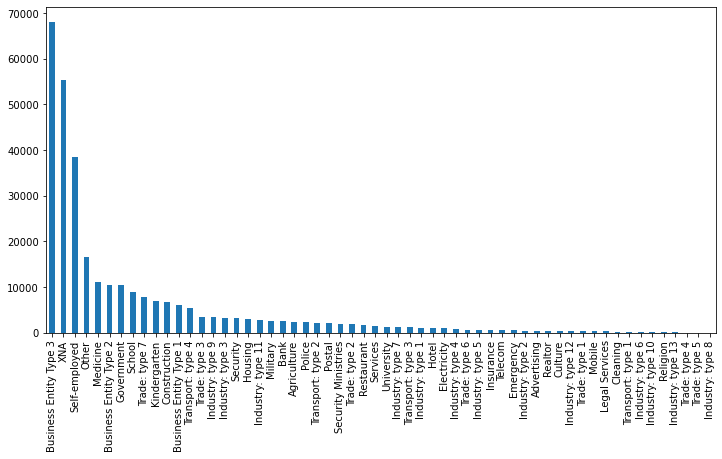

In [20]:
# Checking the most common organisation type to impute the missing value with
app.ORGANIZATION_TYPE.value_counts().plot(kind='bar', figsize = (12,6))
plt.show()

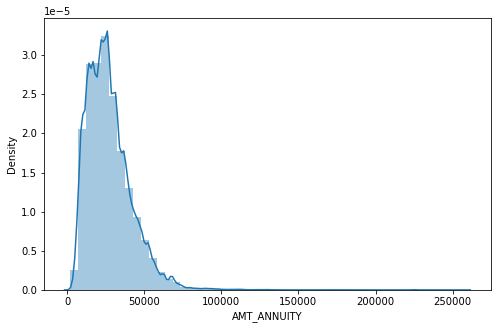

In [21]:
# Checking the skewness of the data in AMT_ANNUITY column
plt.figure(figsize=[8,5])
sns.distplot(app.AMT_ANNUITY)
plt.show()

In [22]:
# Out of remaining columns with blank values only the following columns on which further analysis is to be conducted should be imputed 
# imputed with mode as per the column description provided
print(app.OCCUPATION_TYPE.mode())
print(app.AMT_REQ_CREDIT_BUREAU_YEAR.mode())
print(app.AMT_REQ_CREDIT_BUREAU_QRT.mode())
# imputed with median as the data is skewed as per the distribution plot above
print(app.AMT_ANNUITY.median())
# Correction of XNA to Other for presentation purposes in column ORGANIZATION_TYPE
app.loc[app.ORGANIZATION_TYPE=='XNA',"ORGANIZATION_TYPE"]='Others'

0    Laborers
dtype: object
0    0.0
dtype: float64
0    0.0
dtype: float64
24903.0


In [23]:
app.OCCUPATION_TYPE.fillna('Laborers',inplace=True)
app.OCCUPATION_TYPE.isnull().sum()/len(app)

0.0

In [24]:
app.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(0,inplace=True)
app.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()/len(app)

0.0

In [25]:
app.AMT_REQ_CREDIT_BUREAU_QRT.fillna(0,inplace=True)
app.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()/len(app)

0.0

In [26]:
fill_annuity=app['AMT_ANNUITY'].median()
app.loc[app['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=fill_annuity

app.AMT_ANNUITY.isnull().sum()/len(app)

0.0

In [27]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [28]:
# Checking each date column for negative values
app.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [29]:
app.DAYS_EMPLOYED.describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [30]:
app.DAYS_REGISTRATION.describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [31]:
app.DAYS_ID_PUBLISH.describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [32]:
app.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [33]:
# Selecting all Date columns to change to absolute values
abs_days = [x for x in app if x.startswith('DAYS')]
abs_days

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [34]:
app[abs_days]= abs(app[abs_days])

In [35]:
# Rechecking the Days columns for negative values
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383962e+05,0.020868,16036.995067,67724.742149,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.229631,1.643447
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.694465e+05,0.013831,4363.988632,139443.751806,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.744059,1.855821
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Binning of numerical data

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


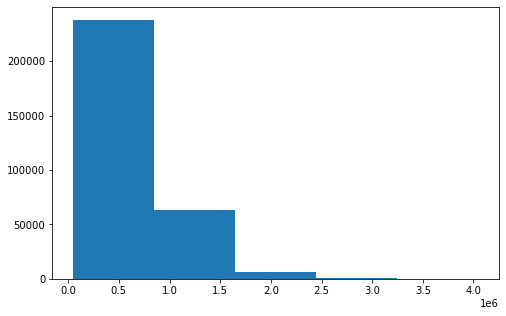

In [36]:
# Checking the distribution of AMT_CREDIT column for binning brackets
print(app.AMT_CREDIT.describe())
plt.figure(figsize=[8,5])
plt.hist(app.AMT_CREDIT,5)
plt.show()

In [37]:
app['AMT_CREDIT'] = app['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
labels = ['>100K','100-200K','200-300K','300-400K','400-500K','500-600K','600-700K','700-800K','800-900K','900-1mill','1mill<']

app['AMT_CREDIT_RANGE'] = pd.cut(app['AMT_CREDIT'], bins, labels=labels)

In [38]:
app.AMT_CREDIT_RANGE.value_counts()

200-300K     54813
1mill<       49985
500-600K     34232
400-500K     32038
100-200K     30140
300-400K     26338
600-700K     24049
800-900K     21792
700-800K     19193
900-1mill     8927
>100K         6004
Name: AMT_CREDIT_RANGE, dtype: int64

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


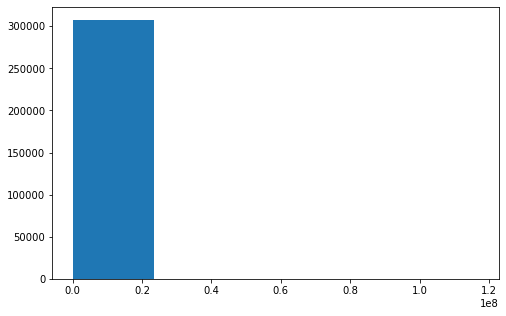

In [39]:
# Checking the distribution of AMT_INCOME_TOTAL column for binning brackets
print(app.AMT_INCOME_TOTAL.describe())
plt.figure(figsize=[8,5])
plt.hist(app.AMT_INCOME_TOTAL,5)
plt.show()

In [40]:
app['AMT_INCOME_TOTAL'] = app['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
labels = ['>100K','100-200K','200-300K','300-400K','400-500K','500-600K','600-700K','700-800K','800-900K','900-1mill','1mill<']

app['AMT_INCOME_RANGE'] = pd.cut(app['AMT_INCOME_TOTAL'], bins, labels=labels)

In [41]:
app.AMT_INCOME_RANGE.value_counts()

100-200K     155898
200-300K      65176
>100K         63698
300-400K      14676
400-500K       5361
500-600K       1095
600-700K        869
800-900K        298
1mill<          247
700-800K        162
900-1mill        28
Name: AMT_INCOME_RANGE, dtype: int64

In [42]:
# Converting DAYS_BIRTH column from numeric to categorical for analysis

app['AGE'] = app['DAYS_BIRTH']//365

bins = [0,20,30,40,50,100]
labels = ['0-20','20-30','30-40','40-50','50+']

app['AGE_GROUP'] = pd.cut(app['AGE'], bins, labels=labels)

In [43]:
app.AGE_GROUP.value_counts()

50+      97187
30-40    83117
40-50    74401
20-30    52805
0-20         1
Name: AGE_GROUP, dtype: int64

In [44]:
# Converting DAYS_EMPLOYED column from numeric to categorical for analysis
app['YEARS_EMPLOYED'] = app['DAYS_EMPLOYED']//365

bins = [0,5,10,20,30,40,50,60,150]
labels = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60+']

app['PERIOD_EMPLOYED'] = pd.cut(app['YEARS_EMPLOYED'], bins, labels=labels)

In [45]:
app.PERIOD_EMPLOYED.value_counts()

0-5      124634
5-10      55983
10-20     32658
20-30      8409
30-40      2374
40-50       175
60+           0
50-60         0
Name: PERIOD_EMPLOYED, dtype: int64

## Checking for Outliers

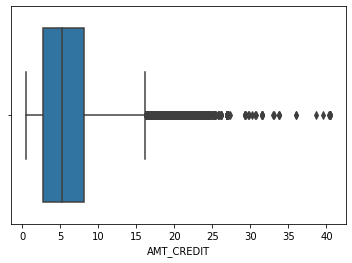

In [46]:
sns.boxplot(app['AMT_CREDIT'])
plt.show()

It can be assumed the values above 35 are outliers

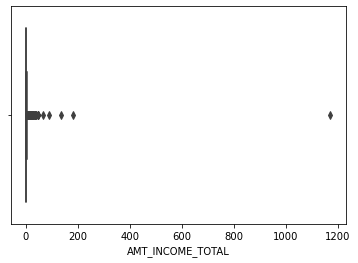

In [47]:
sns.boxplot(app['AMT_INCOME_TOTAL'])
plt.show()

Value above 1000 is clearly an outlier

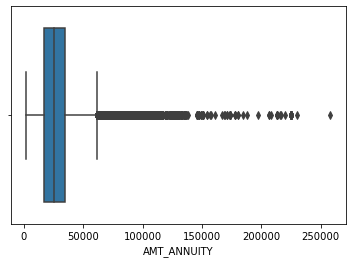

In [48]:
sns.boxplot(app['AMT_ANNUITY'])
plt.show()

Value above 250,000 can be considered outlier

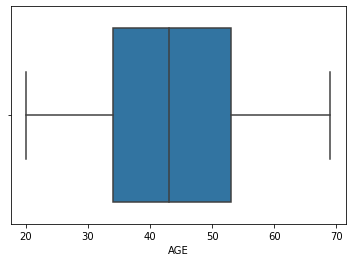

In [49]:
sns.boxplot(app['AGE'])
plt.show()

There are no outliers in age

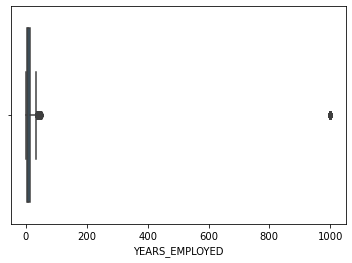

In [50]:
sns.boxplot(app['YEARS_EMPLOYED'])
plt.show()

In [51]:
app[app["YEARS_EMPLOYED"]>800]["NAME_INCOME_TYPE"].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

As observable from above the outliers present in column YEARS_EMPLOYED is due to the Pensioner & Unemployed customers

### Checking for Imbalance

0    92.0
1     8.0
Name: TARGET, dtype: float64 2


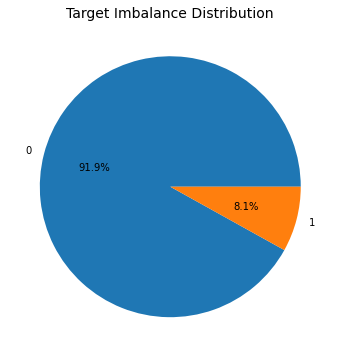

In [52]:
# Checking for imbalance in Target data column
balance=app.TARGET.value_counts()

pie, ax = plt.subplots(figsize=[10,6])
labels = balance.keys()
plt.pie(x=balance, autopct="%.1f%%", labels=labels)
plt.title("Target Imbalance Distribution", fontsize=14)

# Ratio of Imbalance
print(round(app.TARGET.value_counts(normalize=True)*100),2)

In [53]:
# Dividing the dataset on basis of Target column for analysis
Target0 = app.loc[app.TARGET == 0]
Target1 = app.loc[app.TARGET == 1]

In [54]:
# Creating Function to perform univariate analysis on data
def uni_as(df,col,hue =None):
    sns.set(style="whitegrid")
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(16,6))
    
    ax[0].set_title("Box Plot")
    sns.boxplot(data =df, x=col,ax=ax[0])
    
    ax[1].set_title("Distribution Plot")
    sns.distplot(df[~df[col].isna()][col],ax=ax[1])
    plt.show()

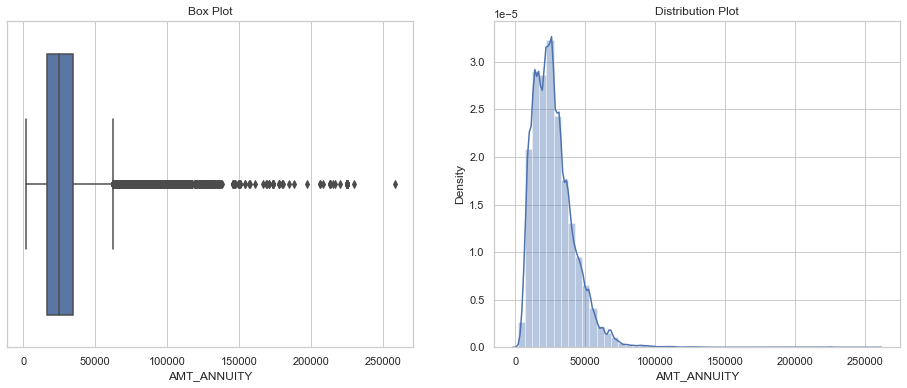

In [55]:
# Univariate analysis for Client without payment difficulties
uni_as(df=Target0,col='AMT_ANNUITY')

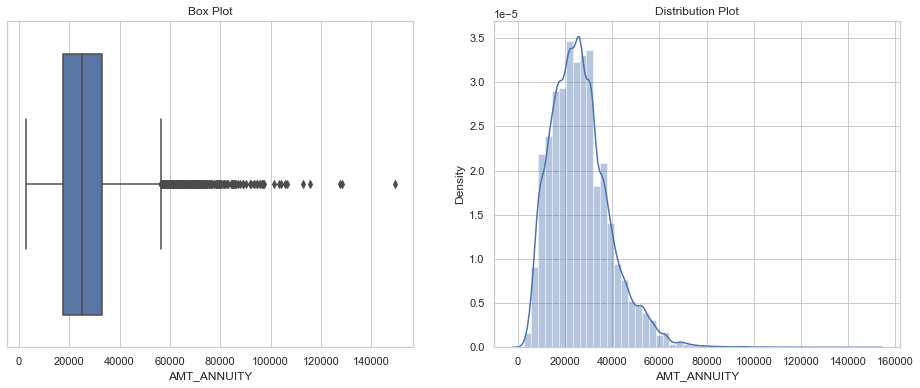

In [56]:
# Univariate analysis for Client with payment difficulties
uni_as(df=Target1,col='AMT_ANNUITY')

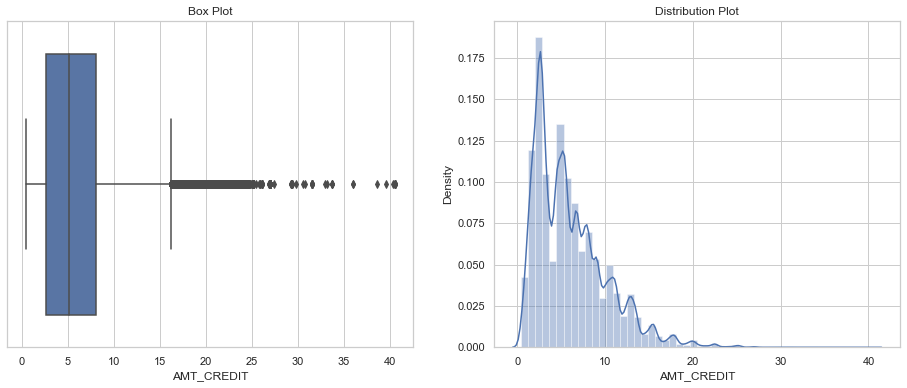

In [57]:
# Univariate analysis for Client without payment difficulties
uni_as(df=Target0,col='AMT_CREDIT')

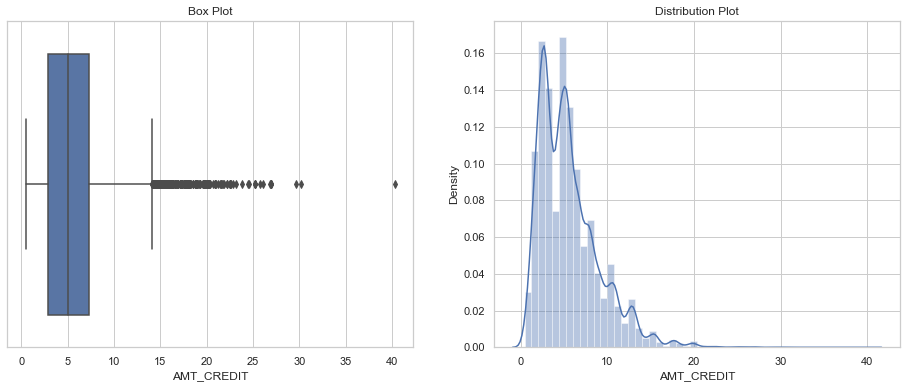

In [58]:
# Univariate analysis for Client with payment difficulties
uni_as(df=Target1,col='AMT_CREDIT')

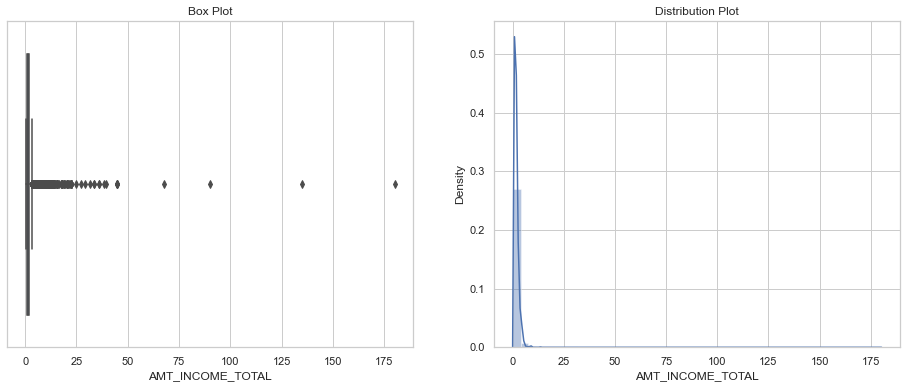

In [59]:
# Univariate analysis for Client without payment difficulties
uni_as(df=Target0,col='AMT_INCOME_TOTAL')

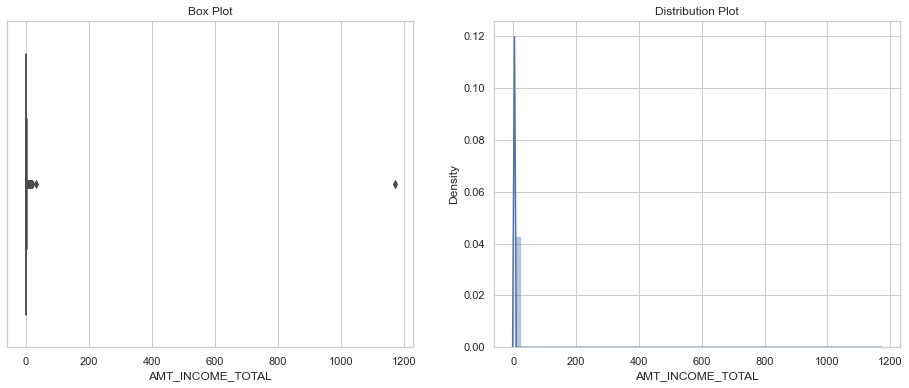

In [60]:
# Univariate analysis for Client with payment difficulties
uni_as(df=Target1,col='AMT_INCOME_TOTAL')

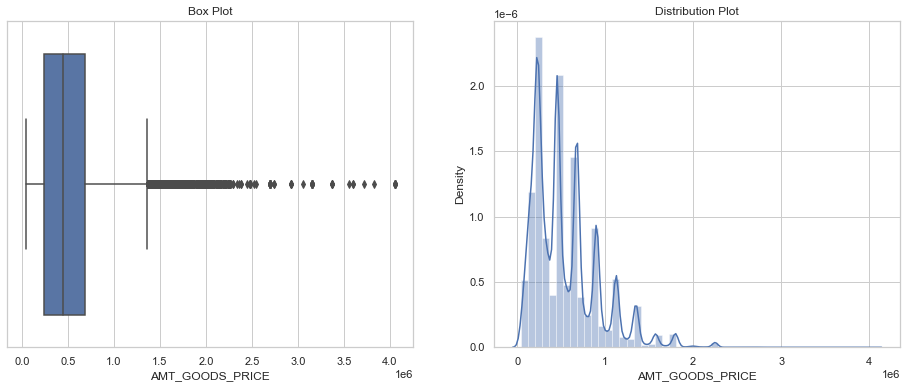

In [61]:
# Univariate analysis for Client without payment difficulties
uni_as(df=Target0,col='AMT_GOODS_PRICE')

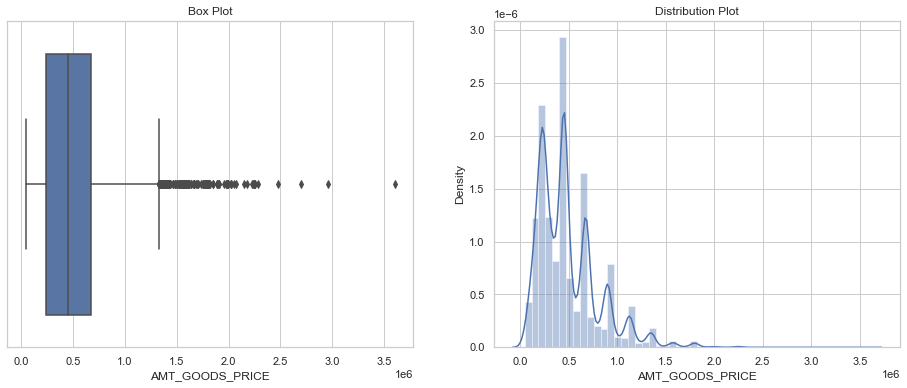

In [62]:
# Univariate analysis for Client with payment difficulties
uni_as(df=Target1,col='AMT_GOODS_PRICE')

###### Categorical vs Numeric data type analysis

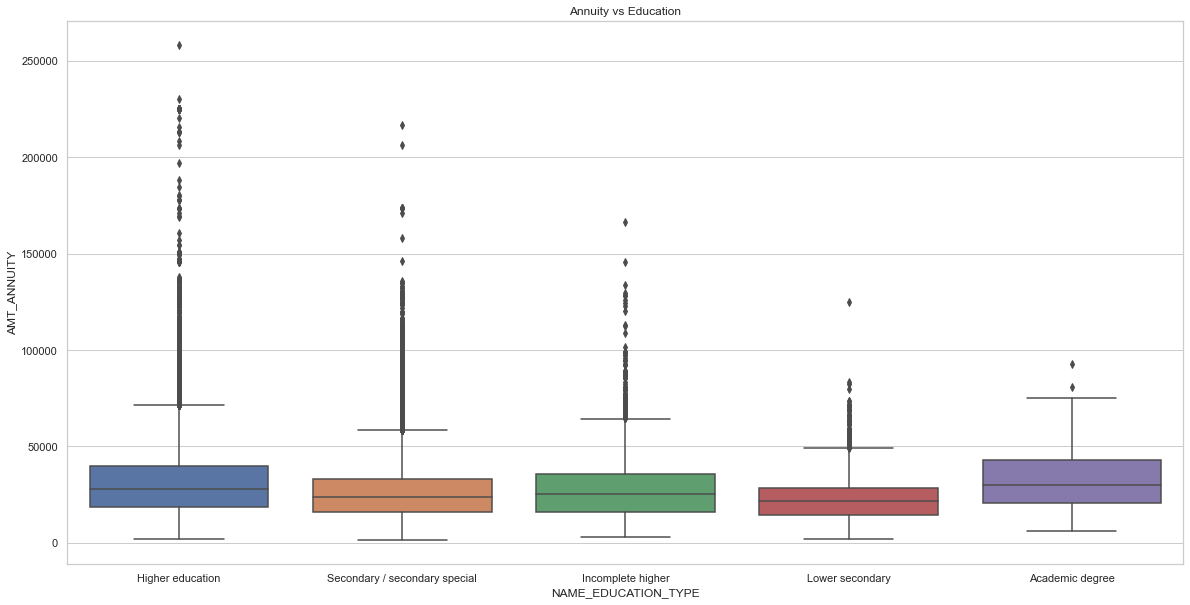

In [63]:
# Univariate analysis for Client without payment difficulties
plt.figure(figsize=(20,10))
sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_ANNUITY')
plt.title('Annuity vs Education')
plt.show()

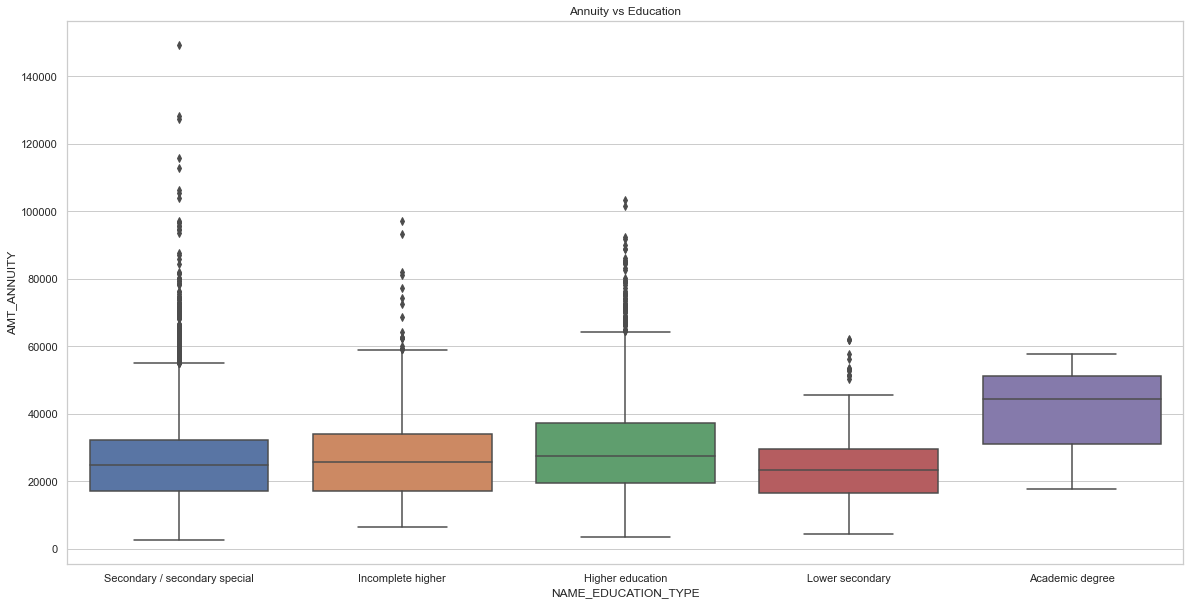

In [64]:
# Univariate analysis for Client with payment difficulties
plt.figure(figsize=(20,10))
sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_ANNUITY')
plt.title('Annuity vs Education')
plt.show()

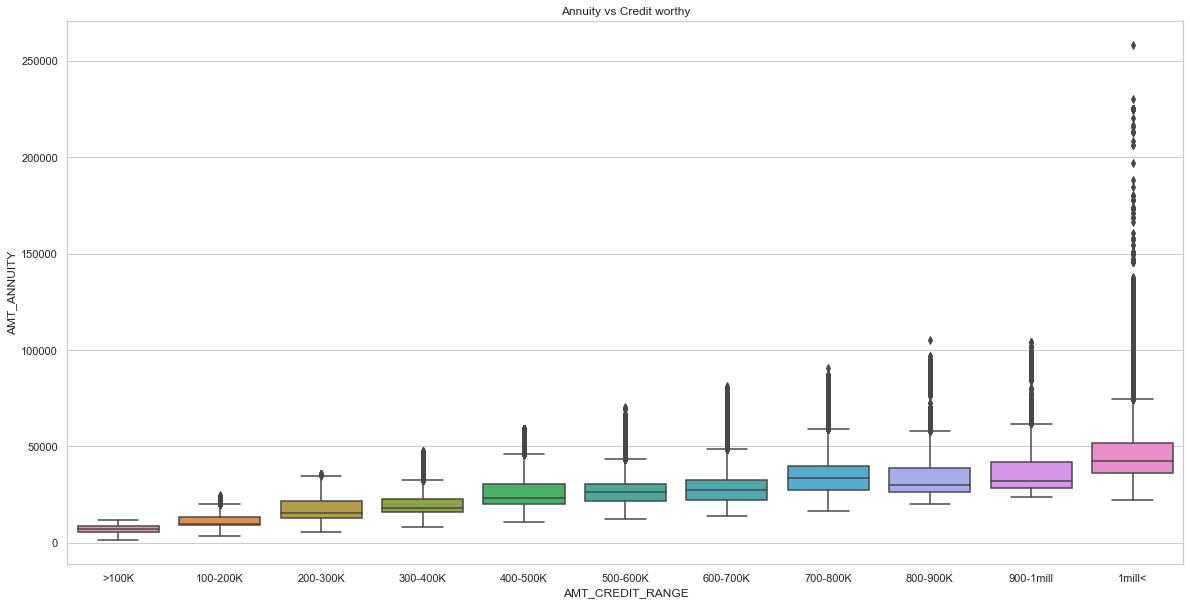

In [65]:
# Univariate analysis for Client without payment difficulties
plt.figure(figsize=(20,10))
sns.boxplot(data =Target0, x='AMT_CREDIT_RANGE',y='AMT_ANNUITY')
plt.title('Annuity vs Credit worthy')
plt.show()

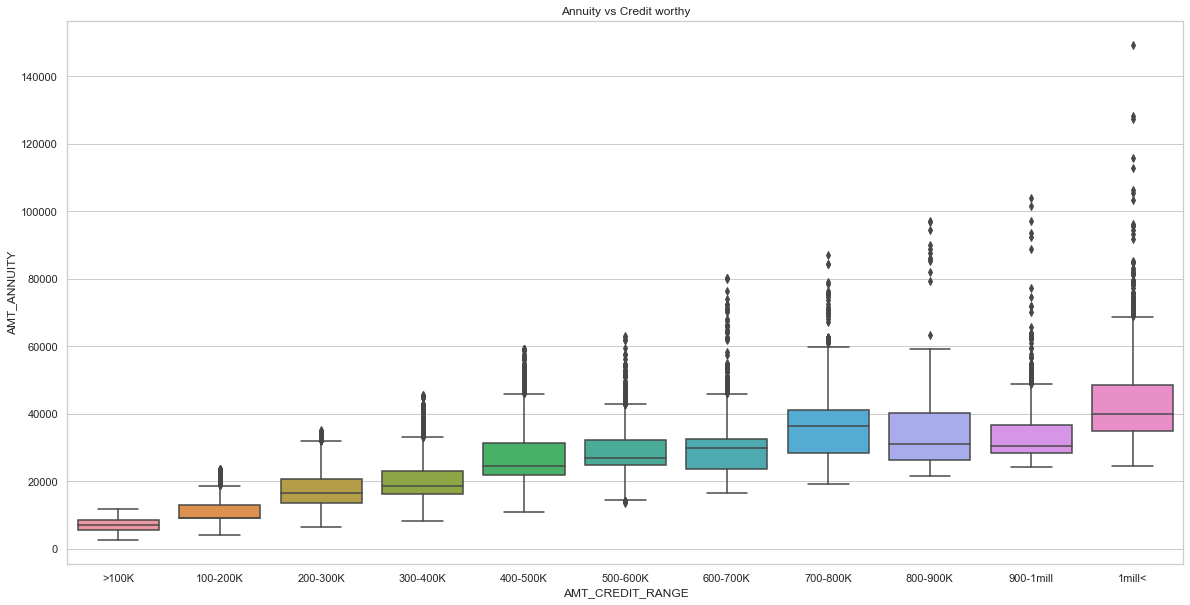

In [66]:
# Univariate analysis for Client with payment difficulties
plt.figure(figsize=(20,10))
sns.boxplot(data =Target1, x='AMT_CREDIT_RANGE',y='AMT_ANNUITY')
plt.title('Annuity vs Credit worthy')
plt.show()

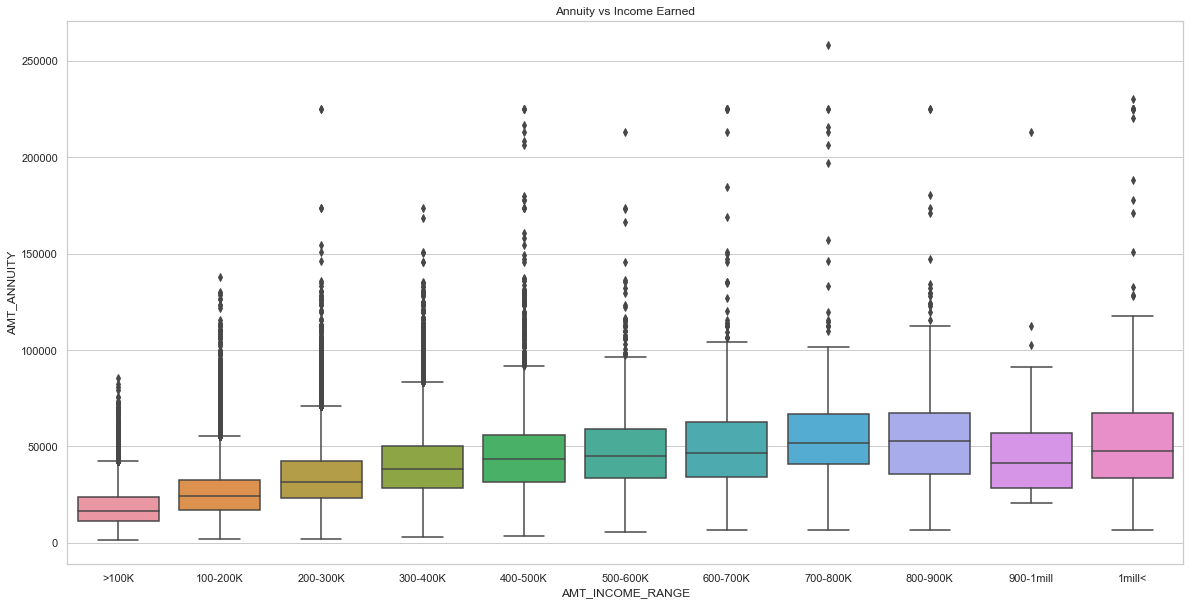

In [67]:
# Univariate analysis for Client without payment difficulties
plt.figure(figsize=(20,10))
sns.boxplot(data =Target0, x='AMT_INCOME_RANGE',y='AMT_ANNUITY')
plt.title('Annuity vs Income Earned')
plt.show()

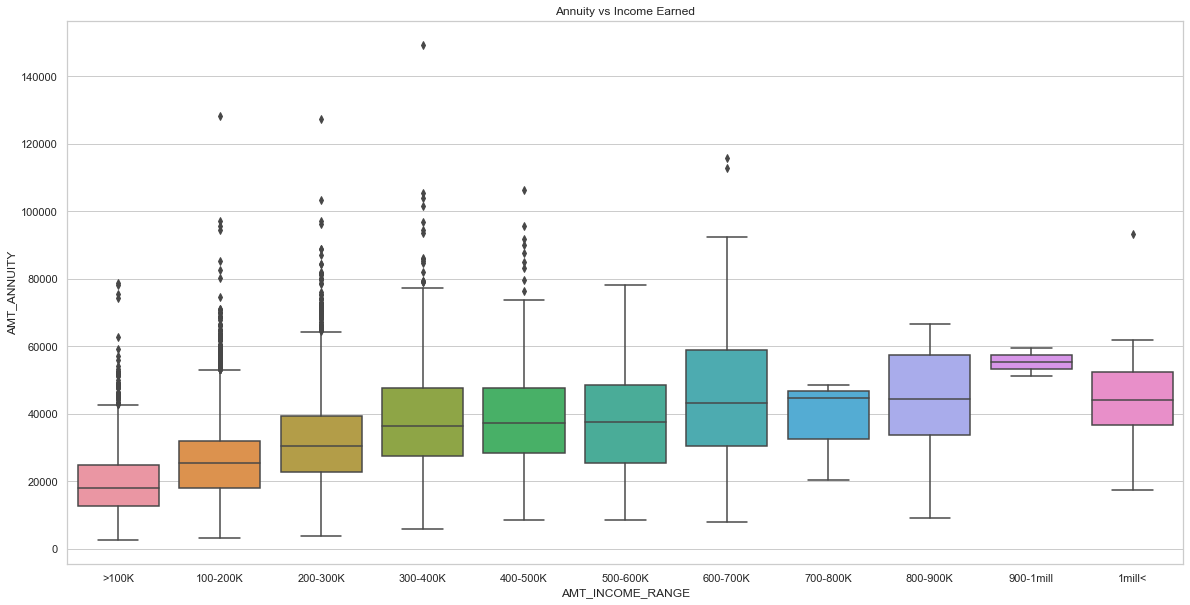

In [68]:
# Univariate analysis for Client with payment difficulties
plt.figure(figsize=(20,10))
sns.boxplot(data =Target1, x='AMT_INCOME_RANGE',y='AMT_ANNUITY')
plt.title('Annuity vs Income Earned')
plt.show()

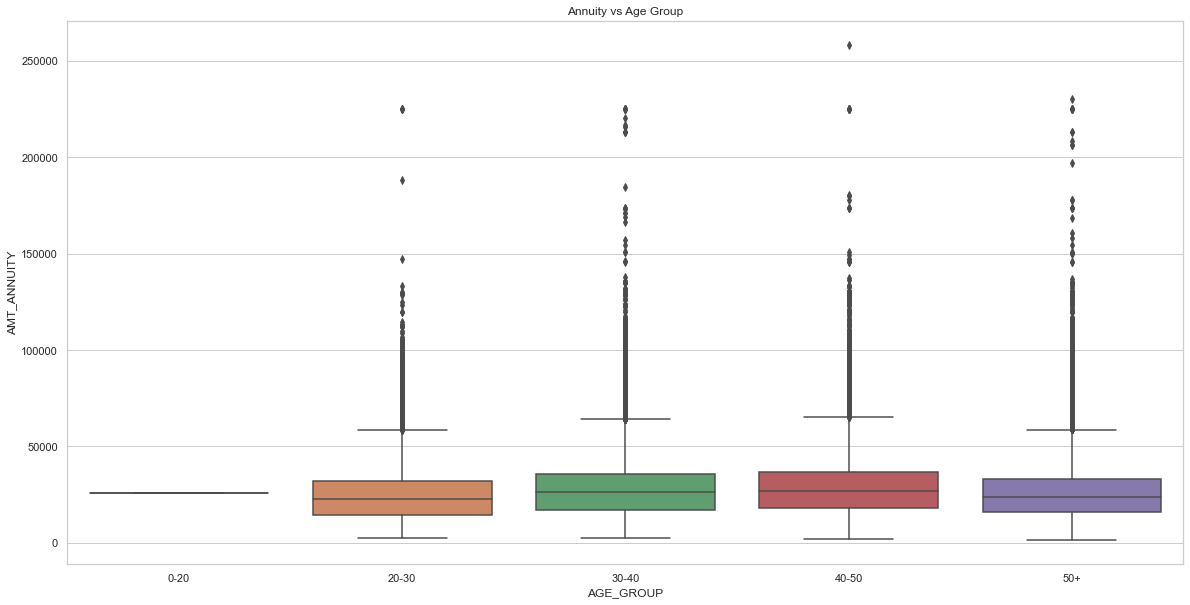

In [69]:
# Univariate analysis for Client without payment difficulties
plt.figure(figsize=(20,10))
sns.boxplot(data =Target0, x='AGE_GROUP',y='AMT_ANNUITY')
plt.title('Annuity vs Age Group')
plt.show()

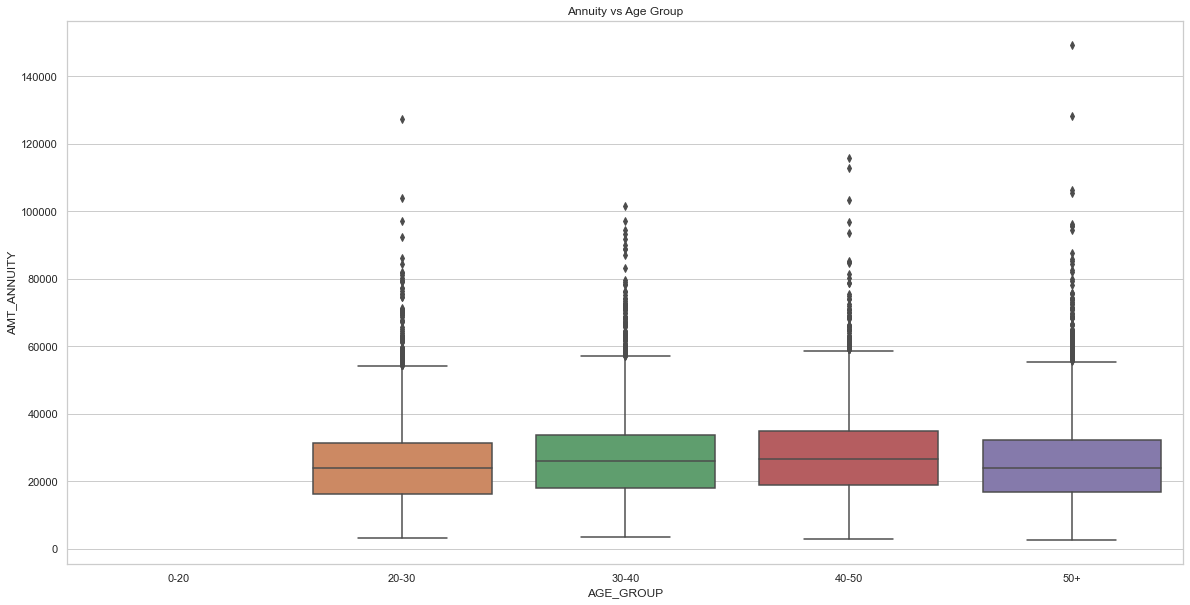

In [70]:
# Univariate analysis for Client with payment difficulties
plt.figure(figsize=(20,10))
sns.boxplot(data =Target1, x='AGE_GROUP',y='AMT_ANNUITY')
plt.title('Annuity vs Age Group')
plt.show()

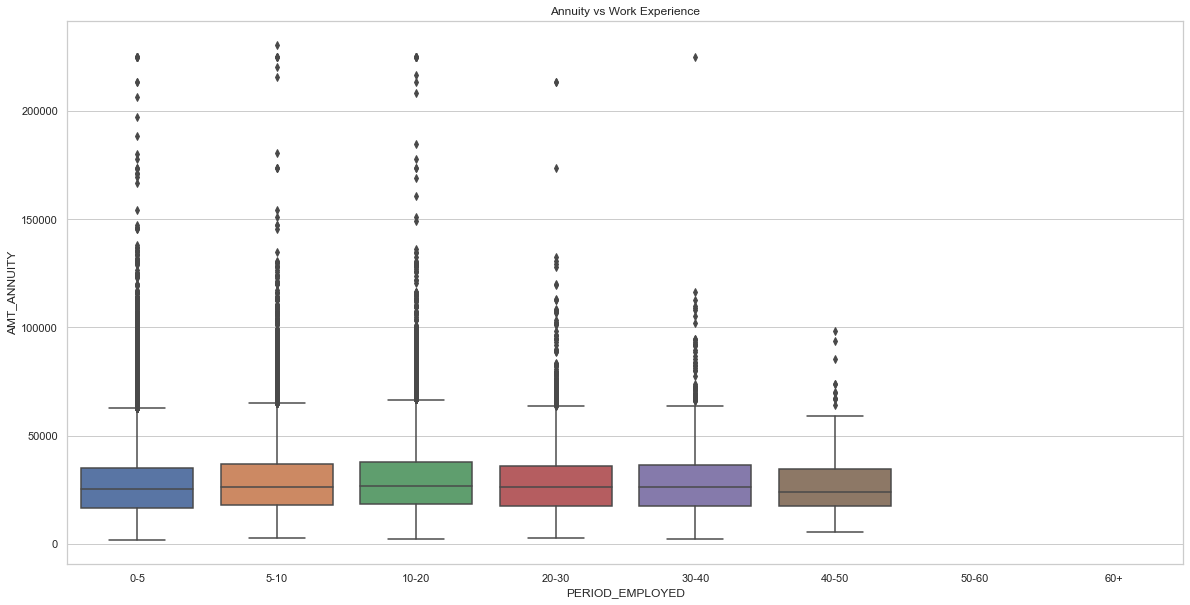

In [71]:
# Univariate analysis for Client without payment difficulties
plt.figure(figsize=(20,10))
sns.boxplot(data =Target0, x='PERIOD_EMPLOYED',y='AMT_ANNUITY')
plt.title('Annuity vs Work Experience')
plt.show()

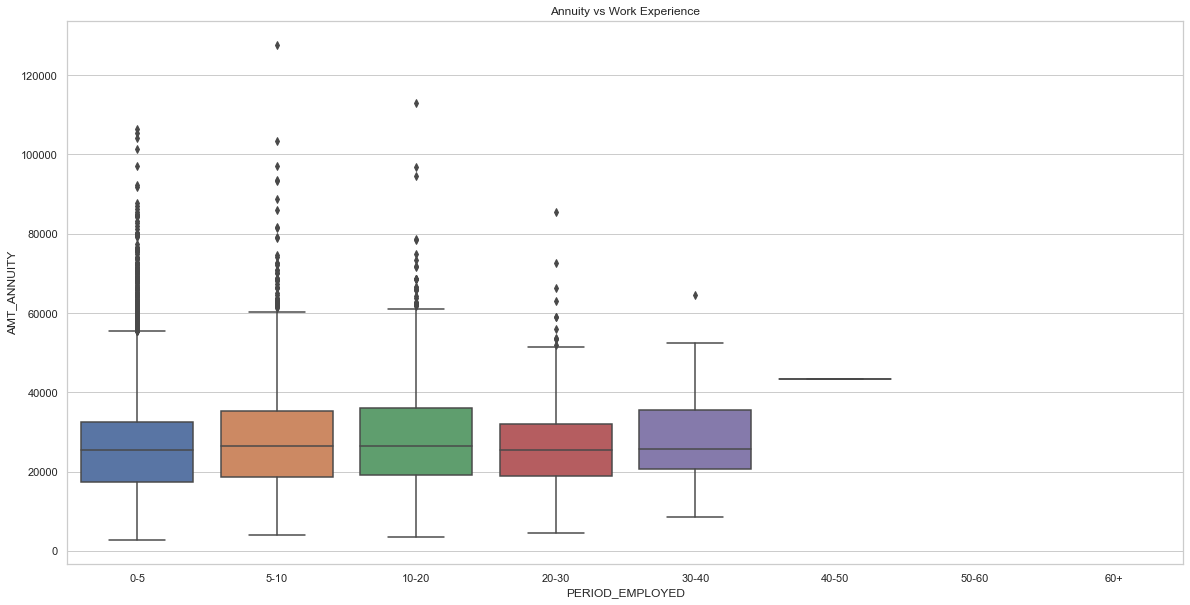

In [72]:
# Univariate analysis for Client with payment difficulties
plt.figure(figsize=(20,10))
sns.boxplot(data =Target1, x='PERIOD_EMPLOYED',y='AMT_ANNUITY')
plt.title('Annuity vs Work Experience')
plt.show()

##### Numerical Bivariate

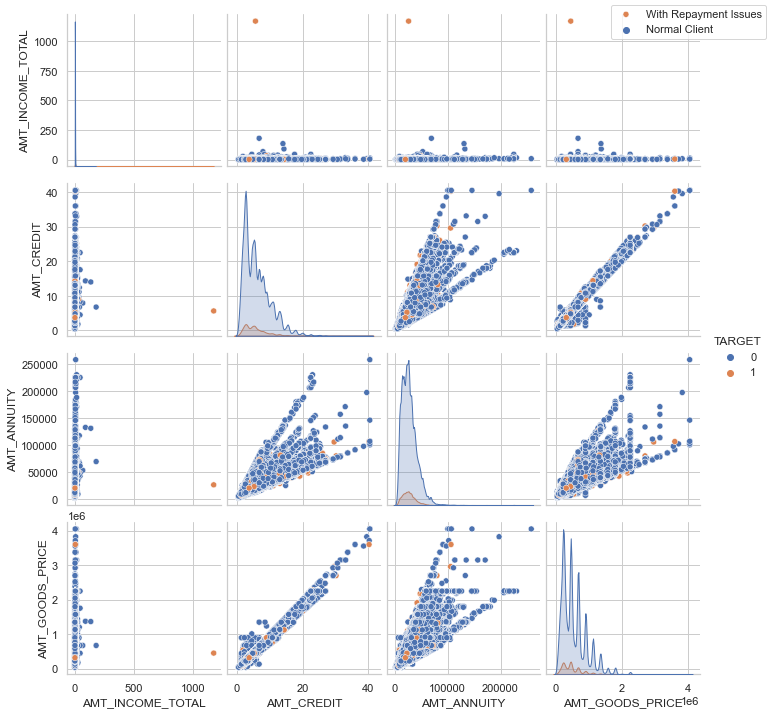

In [73]:
# Bivariate Analysis between the numeric data fields
num_bi = app[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE', 'TARGET']]

pair = sns.pairplot(num_bi, hue='TARGET')
pair.fig.legend(labels=['With Repayment Issues','Normal Client'])

plt.show()

#### Correlation client with pay difficulties

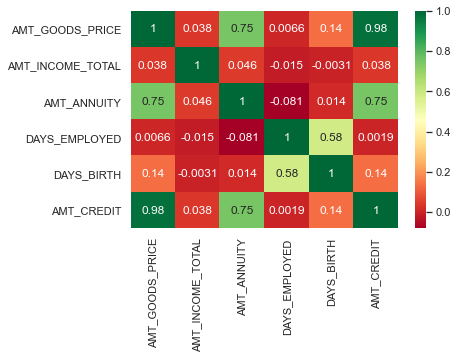

In [74]:
corr1=Target1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH','AMT_CREDIT',]]

corr_1 = corr1.corr()
sns.heatmap(corr_1,annot=True,cmap = 'RdYlGn')
plt.show()

There is a very high correlation between AMT_CREDIT & AMT_GOODS_PRICE, & significant correlation between AMT_CREDIT & AMT_ANNUITY and between DAYS_BIRTH & DAYS_EMPLOYED

#### Correlation Normal clients

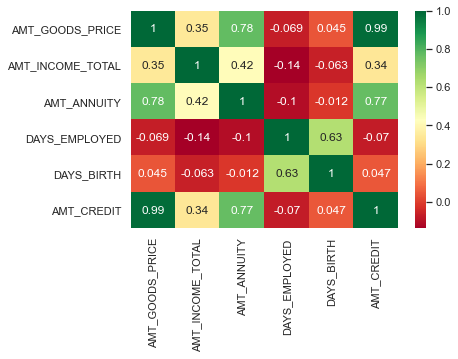

In [75]:
corr0=Target0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH','AMT_CREDIT',]]

corr_0 = corr0.corr()
sns.heatmap(corr_0,annot=True,cmap = 'RdYlGn')
plt.show()

There is a very high correlation between AMT_CREDIT & AMT_GOODS_PRICE, & significant correlation between AMT_CREDIT & AMT_ANNUITY ; between AMT_ANNUITY & AMT_GOODS_PRICE and between DAYS_BIRTH & DAYS_EMPLOYED

### Previous Application data analysis

In [76]:
# Selecting all Date columns to change to absolute values
abs_days = [x for x in prev_app if x.startswith('DAYS')]
abs_days

['DAYS_DECISION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [77]:
prev_app[abs_days]= abs(prev_app[abs_days])

In [78]:
prev_app.DAYS_DECISION.describe()

count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64

Text(0.5, 1.0, 'Previous Contract Status')

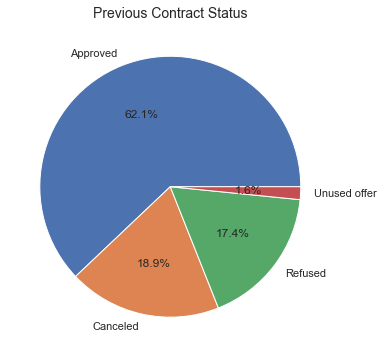

In [79]:
# Previous Contract status category wise
status=prev_app.NAME_CONTRACT_STATUS.value_counts()

pie, ax = plt.subplots(figsize=[10,6])
labels = status.keys()
plt.pie(x=status, autopct="%.1f%%", labels=labels)
plt.title("Previous Contract Status", fontsize=14)

We can say that previously majority of the loans were approved.

In [80]:
prev_app.NAME_CLIENT_TYPE.value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

Text(0.5, 1.0, 'Client Type')

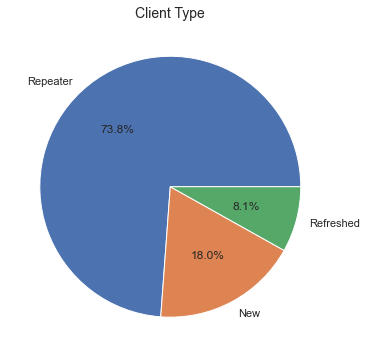

In [81]:
# Imputing the XNA with most common client type
prev_app.loc[prev_app['NAME_CLIENT_TYPE']=='XNA','NAME_CLIENT_TYPE']='Repeater'

client_type=prev_app.NAME_CLIENT_TYPE.value_counts()

pie, ax = plt.subplots(figsize=[10,6])
labels = client_type.keys()
plt.pie(x=client_type, autopct="%.1f%%", labels=labels)
plt.title("Client Type", fontsize=14)

We can observe most clients are repeat clients

In [82]:
prev_app.NAME_PORTFOLIO.value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

Text(0.5, 1.0, 'Loan Type')

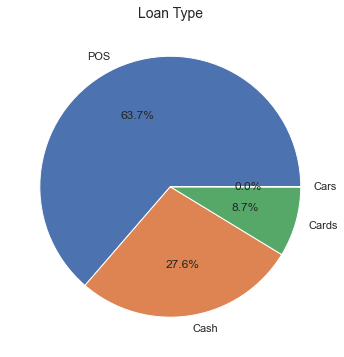

In [83]:
# Imputing XNA with most common Portfolio type
prev_app.loc[prev_app['NAME_PORTFOLIO']=='XNA','NAME_PORTFOLIO']='POS'

loan_type=prev_app.NAME_PORTFOLIO.value_counts()

pie, ax = plt.subplots(figsize=[10,6])
labels = loan_type.keys()
plt.pie(x=loan_type, autopct="%.1f%%", labels=labels)
plt.title("Loan Type", fontsize=14)

Majority of Loan applications were for POS

Text(0.5, 1.0, 'Goods Type')

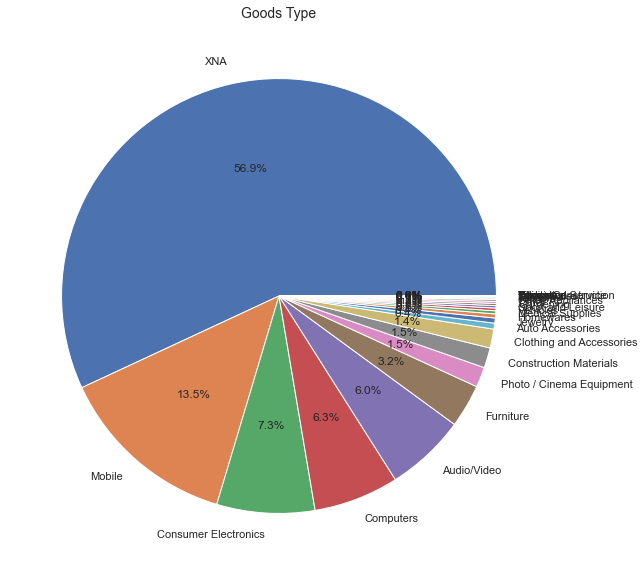

In [84]:
goods_type=prev_app.NAME_GOODS_CATEGORY.value_counts()

pie, ax = plt.subplots(figsize=[12,10])
labels = goods_type.keys()
plt.pie(x=goods_type, autopct="%.1f%%", labels=labels)
plt.title("Goods Type", fontsize=14)

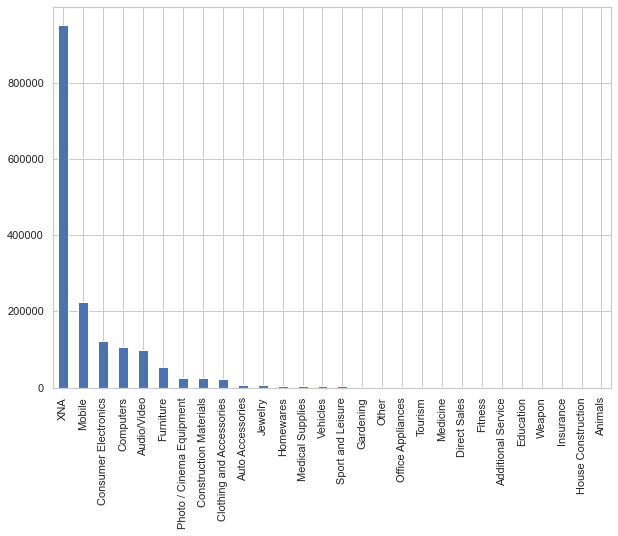

In [85]:
# As pie chart if not showning all the types we will use bar graph instead
prev_app.NAME_GOODS_CATEGORY.value_counts().plot(kind= 'bar', figsize = (10,7))
plt.show()

We can say that in most of the cases the Name of goods category has not been mentioned, 2nd highest goods category is mobile

#### Univariate Analysis for previous applications

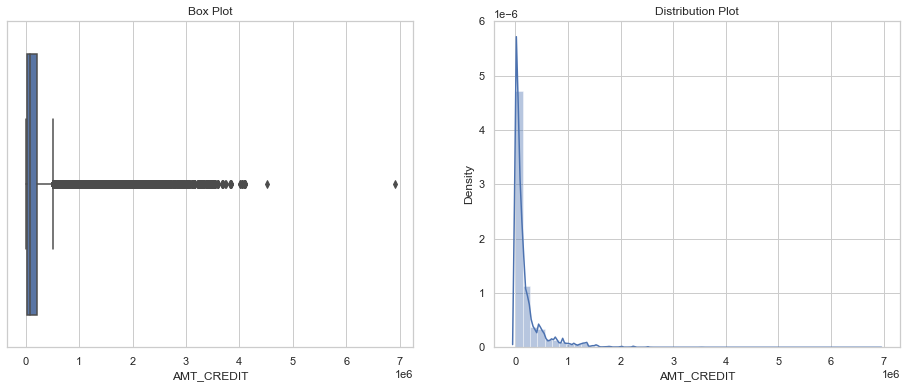

In [86]:
uni_as(df=prev_app,col='AMT_CREDIT')

Value close to 6.9 is clearly an outlier

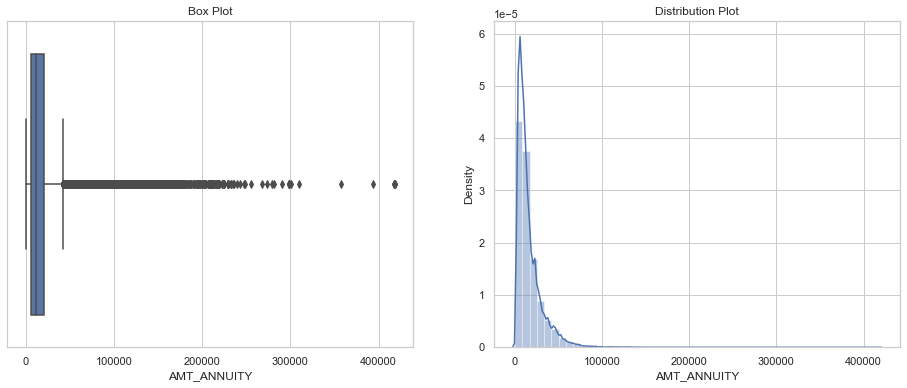

In [87]:
uni_as(df=prev_app,col='AMT_ANNUITY')

Values above 350,000 can be considered outliers

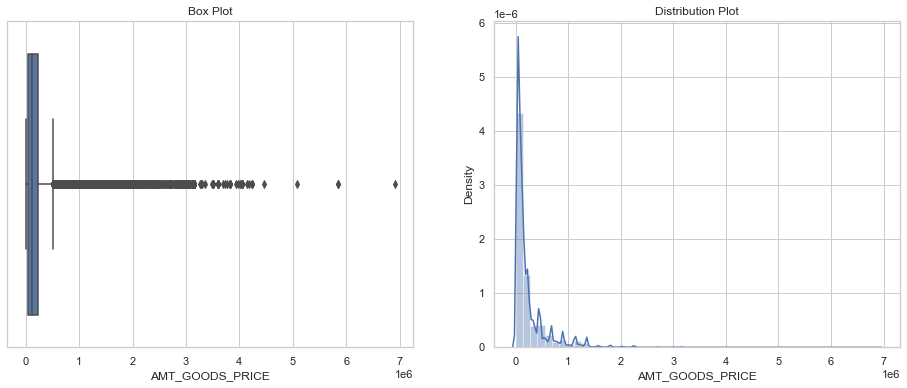

In [88]:
uni_as(df=prev_app,col='AMT_GOODS_PRICE')

Values above 5 can be considered as outliers

#### Combined relevant columns from both the application datas

In [89]:
app_new=app[['SK_ID_CURR','TARGET']]
app_old=prev_app[['SK_ID_CURR','NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE']]
app_merge = app_new.merge(app_old,on='SK_ID_CURR', how='inner')
app_merge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE
0,100002,1,Consumer loans,Approved,New
1,100003,0,Cash loans,Approved,Repeater
2,100003,0,Consumer loans,Approved,Refreshed
3,100003,0,Consumer loans,Approved,Refreshed
4,100004,0,Consumer loans,Approved,New


In [90]:
pivot1 = pd.pivot_table(app_merge, values='TARGET', index=['NAME_CLIENT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
pivot1

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CLIENT_TYPE,,,,
New,0.088216,0.145205,0.110940,0.089448
Refreshed,0.065158,0.081098,0.117412,0.074324
Repeater,0.072143,0.091799,0.120615,0.083371


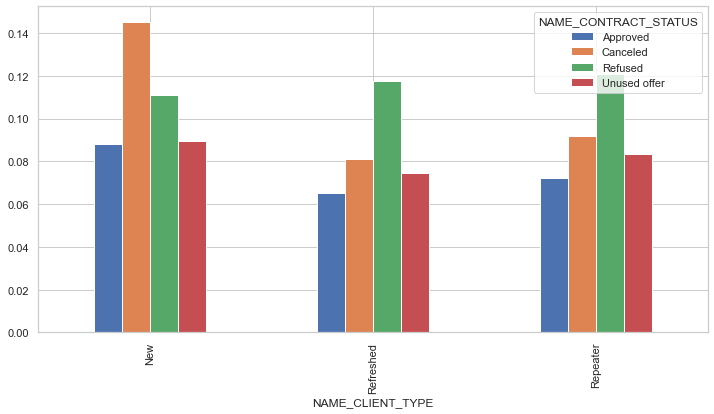

In [92]:
pivot1.plot(kind= 'bar', figsize = (12,6))
plt.show()

New clients who have previously cancelled loan application have most payment difficulties

In [93]:
app_merge.NAME_CONTRACT_TYPE.value_counts()

Cash loans         626764
Consumer loans     625256
Revolving loans    161368
XNA                   313
Name: NAME_CONTRACT_TYPE, dtype: int64

In [94]:
# Changing XNA to most common Contract type
app_merge.loc[app_merge['NAME_CONTRACT_TYPE']=='XNA','NAME_CONTRACT_TYPE']='Cash loans'

In [95]:
pivot2 = pd.pivot_table(app_merge, values='TARGET', index=['NAME_CONTRACT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
pivot2

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CONTRACT_TYPE,,,,
Cash loans,0.075516,0.088541,0.125834,0.092593
Consumer loans,0.073853,0.128668,0.101350,0.082337
Revolving loans,0.090343,0.109254,0.129050,0.000000


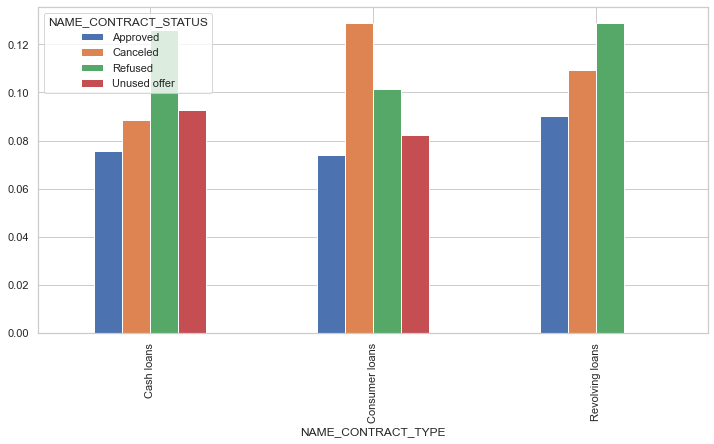

In [96]:
pivot2.plot(kind= 'bar', figsize = (12,6))
plt.show()

Clients who have previously Cancelled loan applications now applying for Consumer loans have most payment difficulties